In [308]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [309]:
cumulative_return = pd.DataFrame()

In [310]:
df = pd.read_csv('results_7d.csv')

In [311]:
def calculate_cumulative_log_return(df):
    # This function calculates the cumulative sum of log returns.
    # This is done by cumulatively summing up the daily log returns.
    cumulative_log_return = df['log_return'].cumsum()
    
    return cumulative_log_return.copy()

def handle_y_test(y_test):
    y_test = pd.DataFrame(y_test)
    y_test = y_test.rename(columns={'return': 'log_return'})
    return y_test

In [312]:
def calculate_daily_risk_free_log_return(risk_free_annual_rate=0.02, trading_days=252):
    daily_rate = risk_free_annual_rate / trading_days
    daily_log_return = np.log(1 + daily_rate)
    return daily_log_return

def calculate_sharpe_ratio(returns, risk_free_rate=calculate_daily_risk_free_log_return()):
    """
    Calculate the Sharpe ratio of a portfolio.
    
    Parameters:
    - returns: A pandas Series representing the returns of the portfolio.
    - risk_free_rate: The risk-free rate of return.
    
    Returns: The Sharpe ratio.
    """
    excess_returns = returns - risk_free_rate
    sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns, axis=0)
    return sharpe_ratio

def calculate_treynor_ratio(returns, risk_free_rate, beta=1):
    """
    Calculate the Treynor ratio of a portfolio.
    
    Parameters:
    - returns: A pandas Series representing the returns of the portfolio.
    - risk_free_rate: The risk-free rate of return.
    - beta: The beta of the portfolio.
    
    Returns: The Treynor ratio.
    """
    excess_returns = returns - risk_free_rate
    treynor_ratio = np.mean(excess_returns) / beta
    return treynor_ratio

def calculate_jensens_alpha(returns, market_returns, risk_free_rate, beta=1):
    """
    Calculate Jensen's Alpha of a portfolio.
    
    Parameters:
    - returns: A pandas Series representing the returns of the portfolio.
    - market_returns: A pandas Series representing the returns of the market.
    - risk_free_rate: The risk-free rate of return.
    - beta: The beta of the portfolio.
    
    Returns: Jensen's Alpha.
    """
    expected_returns = risk_free_rate + beta * (market_returns - risk_free_rate)
    jensens_alpha = np.mean(returns - expected_returns)
    return jensens_alpha

In [313]:
# Cumulative log return


import matplotlib.dates as mdates
cumulative_return['date'] = df['date']

predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM 

cumulative_return['btc_7d_test'] = df['return'].cumsum().copy()

cumulative_return['btc_7d_pred'] = y_pred.cumsum().copy()


In [314]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
results_7d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_7d_conf_matrix)


[[397 376]
 [323 553]]


In [315]:
# Classification report
from sklearn.metrics import classification_report
results_7d_class_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_7d_class_report)

{'-1': {'precision': 0.5513888888888889, 'recall': 0.5135834411384217, 'f1-score': 0.5318151373074347, 'support': 773.0}, '1': {'precision': 0.5952637244348762, 'recall': 0.6312785388127854, 'f1-score': 0.612742382271468, 'support': 876.0}, 'accuracy': 0.5761067313523347, 'macro avg': {'precision': 0.5733263066618826, 'recall': 0.5724309899756035, 'f1-score': 0.5722787597894514, 'support': 1649.0}, 'weighted avg': {'precision': 0.574696563805981, 'recall': 0.5761067313523347, 'f1-score': 0.5748062025521242, 'support': 1649.0}}


In [316]:
df = pd.read_csv('results_30d.csv')
# Cumulative log return
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM 

cumulative_return['btc_30d_test'] = df['return'].cumsum()

cumulative_return['btc_30d_pred'] = y_pred.cumsum()

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
results_30d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_30d_conf_matrix)

# Classification report
from sklearn.metrics import classification_report
results_30d_class_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_30d_class_report)

[[397 376]
 [323 553]]
{'-1': {'precision': 0.5513888888888889, 'recall': 0.5135834411384217, 'f1-score': 0.5318151373074347, 'support': 773.0}, '1': {'precision': 0.5952637244348762, 'recall': 0.6312785388127854, 'f1-score': 0.612742382271468, 'support': 876.0}, 'accuracy': 0.5761067313523347, 'macro avg': {'precision': 0.5733263066618826, 'recall': 0.5724309899756035, 'f1-score': 0.5722787597894514, 'support': 1649.0}, 'weighted avg': {'precision': 0.574696563805981, 'recall': 0.5761067313523347, 'f1-score': 0.5748062025521242, 'support': 1649.0}}


In [317]:

df = pd.read_csv('results_180d.csv')
# Cumulative log return
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM 

cumulative_return['btc_180d_test'] = df['return'].cumsum().copy()

cumulative_return['btc_180d_pred'] = y_pred.cumsum().copy()

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
results_180d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_180d_conf_matrix)

# Classification report
from sklearn.metrics import classification_report
results_180d_class_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_180d_class_report)


[[693  80]
 [767 109]]
{'-1': {'precision': 0.47465753424657536, 'recall': 0.8965071151358344, 'f1-score': 0.6206896551724138, 'support': 773.0}, '1': {'precision': 0.5767195767195767, 'recall': 0.12442922374429223, 'f1-score': 0.20469483568075117, 'support': 876.0}, 'accuracy': 0.48635536688902364, 'macro avg': {'precision': 0.525688555483076, 'recall': 0.5104681694400633, 'f1-score': 0.4126922454265825, 'support': 1649.0}, 'weighted avg': {'precision': 0.5288760601449072, 'recall': 0.48635536688902364, 'f1-score': 0.3997002907850903, 'support': 1649.0}}


In [318]:
df = pd.read_csv('results_30d.csv')
# Cumulative log return
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM 

cumulative_return['btc_30d_test'] = df['return'].cumsum().copy()

cumulative_return['btc_30d_pred'] = y_pred.cumsum().copy()

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
results_30d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_30d_conf_matrix)

# Classification report
from sklearn.metrics import classification_report
results_30d_class_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_30d_class_report)

[[397 376]
 [323 553]]
{'-1': {'precision': 0.5513888888888889, 'recall': 0.5135834411384217, 'f1-score': 0.5318151373074347, 'support': 773.0}, '1': {'precision': 0.5952637244348762, 'recall': 0.6312785388127854, 'f1-score': 0.612742382271468, 'support': 876.0}, 'accuracy': 0.5761067313523347, 'macro avg': {'precision': 0.5733263066618826, 'recall': 0.5724309899756035, 'f1-score': 0.5722787597894514, 'support': 1649.0}, 'weighted avg': {'precision': 0.574696563805981, 'recall': 0.5761067313523347, 'f1-score': 0.5748062025521242, 'support': 1649.0}}


In [319]:

df = pd.read_csv('results_365d.csv')
# Cumulative log return
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM 

cumulative_return['btc_365d_test'] = df['return'].cumsum().copy()

cumulative_return['btc_365d_pred'] = y_pred.cumsum().copy()

# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
results_365d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_365d_conf_matrix)

# Classification report
from sklearn.metrics import classification_report
results_365d_class_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_365d_class_report)

[[ 46 727]
 [ 41 835]]
{'-1': {'precision': 0.5287356321839081, 'recall': 0.059508408796895215, 'f1-score': 0.10697674418604651, 'support': 773.0}, '1': {'precision': 0.5345710627400768, 'recall': 0.9531963470319634, 'f1-score': 0.6849876948318294, 'support': 876.0}, 'accuracy': 0.5342631898120073, 'macro avg': {'precision': 0.5316533474619924, 'recall': 0.5063523779144293, 'f1-score': 0.39598221950893797, 'support': 1649.0}, 'weighted avg': {'precision': 0.5318355940803324, 'recall': 0.5342631898120073, 'f1-score': 0.41403410790084694, 'support': 1649.0}}


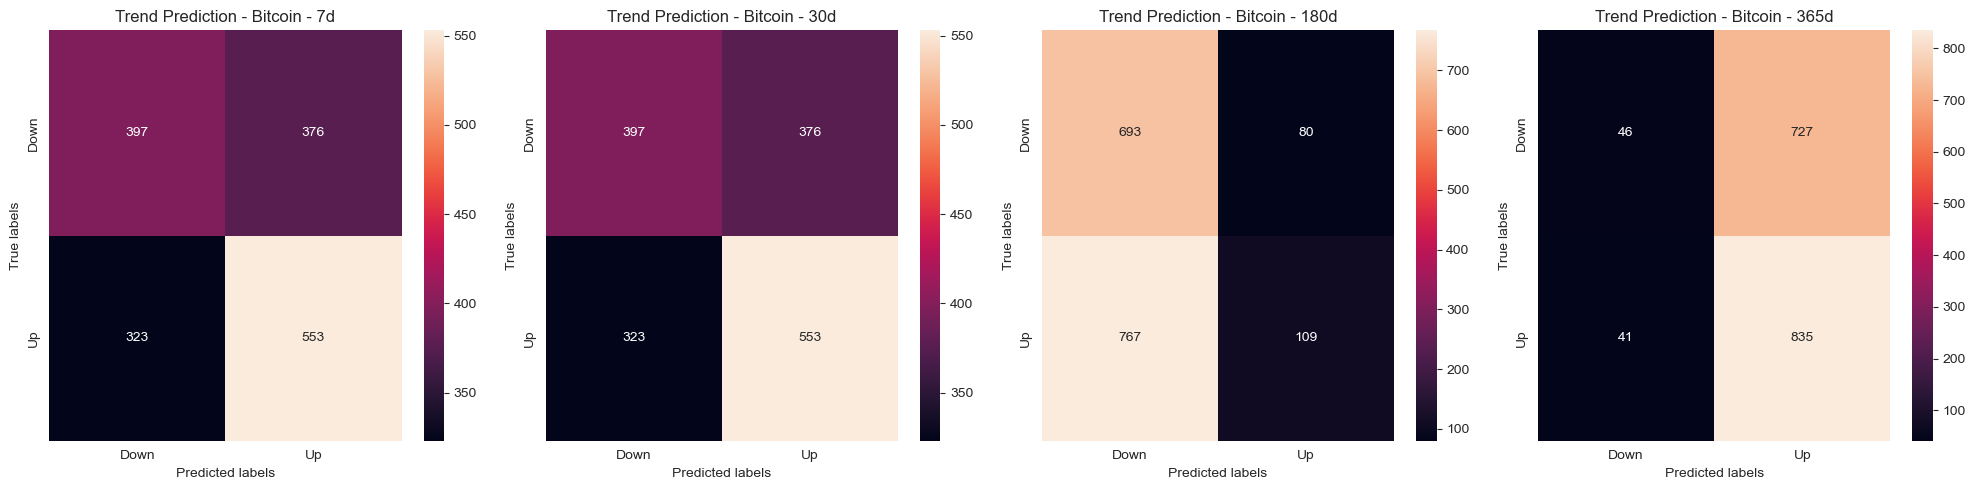

In [320]:
titles = ['7d', '30d', '180d', '365d']
conf_matrices = [results_7d_conf_matrix, results_30d_conf_matrix, results_180d_conf_matrix, results_365d_conf_matrix]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for ax, cm, title in zip(axes, conf_matrices, titles):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
    ax.set_title(f'Trend Prediction - Bitcoin - {title}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
plt.tight_layout()
plt.savefig('btc_confusion_matrices.png')
plt.show()

In [321]:
cumulative_return.to_csv('btc_cumulative_return.csv')

In [322]:
# BTC

y_pred = cumulative_return['btc_30d_pred']
y_test = cumulative_return['btc_30d_test']
risk_free_rate = calculate_daily_risk_free_log_return(0.02, 252)

beta = 1

sharpe_ratio_test = calculate_sharpe_ratio(y_test, risk_free_rate)
treynor_ratio_test = calculate_treynor_ratio(y_test, risk_free_rate, beta)
jensens_alpha_test = calculate_jensens_alpha(y_test, y_test, risk_free_rate, beta)  

sharpe_ratio_pred = calculate_sharpe_ratio(y_pred, risk_free_rate)
treynor_ratio_pred = calculate_treynor_ratio(y_pred, risk_free_rate, beta)
jensens_alpha_pred = calculate_jensens_alpha(y_pred, y_test, risk_free_rate, beta)  

print(f"Performance metrics for y_test:\nSharpe Ratio: {sharpe_ratio_test}\nTreynor Ratio: {treynor_ratio_test}\nJensen's Alpha: {jensens_alpha_test}")
print(f"\nPerformance metrics for y_pred:\nSharpe Ratio: {sharpe_ratio_pred}\nTreynor Ratio: {treynor_ratio_pred}\nJensen's Alpha: {jensens_alpha_pred}")

Performance metrics for y_test:
Sharpe Ratio: 1.2571257286121806
Treynor Ratio: 0.8281213953733363
Jensen's Alpha: 0.0

Performance metrics for y_pred:
Sharpe Ratio: 1.7210540204321518
Treynor Ratio: 4.213759215741286
Jensen's Alpha: 3.3856378203679487


# ToBeContinued....


In [323]:
cumulative_return = pd.DataFrame()

In [324]:
df = pd.read_csv('results_ew_7d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM


cumulative_return['ew_7d_test'] = df['return'].cumsum().copy()
cumulative_return['ew_7d_pred'] = y_pred.cumsum().copy()

results_ew_7d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_ew_7d_conf_matrix)

results_ew_7d_class_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_ew_7d_class_report)


[[607   0]
 [128 914]]
{'-1': {'precision': 0.8258503401360544, 'recall': 1.0, 'f1-score': 0.9046199701937406, 'support': 607.0}, '1': {'precision': 1.0, 'recall': 0.8771593090211133, 'f1-score': 0.934560327198364, 'support': 1042.0}, 'accuracy': 0.9223771983020013, 'macro avg': {'precision': 0.9129251700680272, 'recall': 0.9385796545105567, 'f1-score': 0.9195901486960523, 'support': 1649.0}, 'weighted avg': {'precision': 0.9358951828153943, 'recall': 0.9223771983020013, 'f1-score': 0.9235392254992698, 'support': 1649.0}}


In [325]:
df = pd.read_csv('results_ew_30d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['ew_30d_test'] = df['return'].cumsum().copy()
cumulative_return['ew_30d_pred'] = y_pred.cumsum().copy()
    
results_ew_30d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_ew_30d_conf_matrix)

results_ew_30d_class_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_ew_30d_class_report)


[[524  83]
 [151 891]]
{'-1': {'precision': 0.7762962962962963, 'recall': 0.8632619439868204, 'f1-score': 0.8174726989079564, 'support': 607.0}, '1': {'precision': 0.9147843942505134, 'recall': 0.8550863723608445, 'f1-score': 0.8839285714285714, 'support': 1042.0}, 'accuracy': 0.8580958156458459, 'macro avg': {'precision': 0.8455403452734048, 'recall': 0.8591741581738325, 'f1-score': 0.8507006351682639, 'support': 1649.0}, 'weighted avg': {'precision': 0.8638066650460199, 'recall': 0.8580958156458459, 'f1-score': 0.8594660398215288, 'support': 1649.0}}


In [326]:
df = pd.read_csv('results_ew_180d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['ew_180d_test'] = df['return'].cumsum().copy()
cumulative_return['ew_180d_pred'] = y_pred.cumsum().copy()

results_ew_180d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_ew_180d_conf_matrix)

results_ew_180d_class_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_ew_180d_class_report)


[[ 541   66]
 [  11 1031]]
{'-1': {'precision': 0.980072463768116, 'recall': 0.8912685337726524, 'f1-score': 0.9335634167385678, 'support': 607.0}, '1': {'precision': 0.9398359161349134, 'recall': 0.989443378119002, 'f1-score': 0.9640018700327256, 'support': 1042.0}, 'accuracy': 0.9533050333535477, 'macro avg': {'precision': 0.9599541899515147, 'recall': 0.9403559559458272, 'f1-score': 0.9487826433856468, 'support': 1649.0}, 'weighted avg': {'precision': 0.9546470649604767, 'recall': 0.9533050333535477, 'f1-score': 0.9527974181530691, 'support': 1649.0}}


In [327]:
df = pd.read_csv('results_ew_365d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['ew_365d_test'] = df['return'].cumsum().copy()
cumulative_return['ew_365d_pred'] = y_pred.cumsum().copy()

results_ew_365d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_ew_365d_conf_matrix)

results_ew_365d_class_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_ew_365d_class_report)

[[510  97]
 [208 834]]
{'-1': {'precision': 0.7103064066852368, 'recall': 0.8401976935749588, 'f1-score': 0.769811320754717, 'support': 607.0}, '1': {'precision': 0.8958109559613319, 'recall': 0.800383877159309, 'f1-score': 0.8454130765331982, 'support': 1042.0}, 'accuracy': 0.8150394178289873, 'macro avg': {'precision': 0.8030586813232843, 'recall': 0.820290785367134, 'f1-score': 0.8076121986439576, 'support': 1649.0}, 'weighted avg': {'precision': 0.827526382637748, 'recall': 0.8150394178289873, 'f1-score': 0.81758392810534, 'support': 1649.0}}


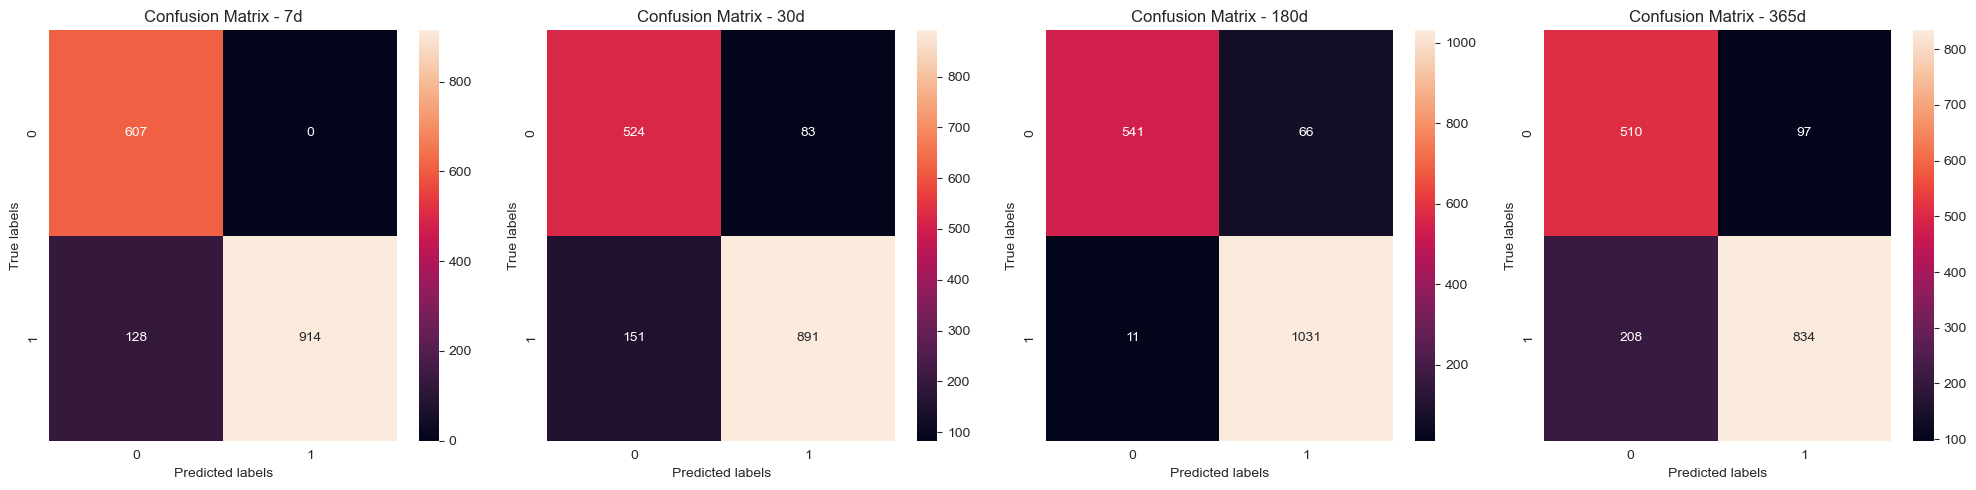

In [328]:
titles = ['7d', '30d', '180d', '365d']
conf_matrices = [results_ew_7d_conf_matrix, results_ew_30d_conf_matrix, results_ew_180d_conf_matrix, results_ew_365d_conf_matrix]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for ax, cm, title in zip(axes, conf_matrices, titles):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
plt.tight_layout()
plt.savefig('ew_confusion_matrices.png')
plt.show()


In [329]:
cumulative_return.to_csv('ew_cumulative_return.csv')

In [330]:
# EW

y_pred = cumulative_return['ew_180d_pred']
y_test = cumulative_return['ew_180d_test']
risk_free_rate = calculate_daily_risk_free_log_return(0.02, 252)

beta = 1

sharpe_ratio_test = calculate_sharpe_ratio(y_test, risk_free_rate)
treynor_ratio_test = calculate_treynor_ratio(y_test, risk_free_rate, beta)
jensens_alpha_test = calculate_jensens_alpha(y_test, y_test, risk_free_rate, beta)  

sharpe_ratio_pred = calculate_sharpe_ratio(y_pred, risk_free_rate)
treynor_ratio_pred = calculate_treynor_ratio(y_pred, risk_free_rate, beta)
jensens_alpha_pred = calculate_jensens_alpha(y_pred, y_test, risk_free_rate, beta)  

print(f"Performance metrics for y_test:\nSharpe Ratio: {sharpe_ratio_test}\nTreynor Ratio: {treynor_ratio_test}\nJensen's Alpha: {jensens_alpha_test}")
print(f"\nPerformance metrics for y_pred:\nSharpe Ratio: {sharpe_ratio_pred}\nTreynor Ratio: {treynor_ratio_pred}\nJensen's Alpha: {jensens_alpha_pred}")

Performance metrics for y_test:
Sharpe Ratio: 1.6357677671198358
Treynor Ratio: 5.415665915052894
Jensen's Alpha: 0.0

Performance metrics for y_pred:
Sharpe Ratio: 1.7443176225240273
Treynor Ratio: 19.739905023319764
Jensen's Alpha: 14.324239108266871


In [331]:
cumulative_return = pd.DataFrame()

In [332]:
df = pd.read_csv('results_portfolio_losers_window_30_assets_300_7d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_30_300_7d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_30_300_7d_pred'] = y_pred.cumsum().copy()

results_port_l_30_300_7d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_30_300_7d_conf_matrix)

results_port_l_30_300_7d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_l_30_300_7d_classification_report)


[[668   0]
 [119 862]]
{'-1': {'precision': 0.8487928843710292, 'recall': 1.0, 'f1-score': 0.9182130584192439, 'support': 668.0}, '1': {'precision': 1.0, 'recall': 0.8786952089704383, 'f1-score': 0.9354313619099295, 'support': 981.0}, 'accuracy': 0.9278350515463918, 'macro avg': {'precision': 0.9243964421855146, 'recall': 0.9393476044852191, 'f1-score': 0.9268222101645867, 'support': 1649.0}, 'weighted avg': {'precision': 0.9387469052515752, 'recall': 0.9278350515463918, 'f1-score': 0.9284563305383237, 'support': 1649.0}}


In [333]:
df = pd.read_csv('results_portfolio_losers_window_30_assets_300_30d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_30_300_30d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_30_300_30d_pred'] = y_pred.cumsum().copy()

results_port_l_30_300_30d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_30_300_30d_conf_matrix)
    
results_port_l_30_300_30d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_l_30_300_30d_classification_report)

[[554 114]
 [  0 981]]
{'-1': {'precision': 1.0, 'recall': 0.8293413173652695, 'f1-score': 0.9067103109656302, 'support': 668.0}, '1': {'precision': 0.8958904109589041, 'recall': 1.0, 'f1-score': 0.9450867052023121, 'support': 981.0}, 'accuracy': 0.9308671922377199, 'macro avg': {'precision': 0.947945205479452, 'recall': 0.9146706586826348, 'f1-score': 0.9258985080839711, 'support': 1649.0}, 'weighted avg': {'precision': 0.9380645804431079, 'recall': 0.9308671922377199, 'f1-score': 0.9295406582950327, 'support': 1649.0}}


In [334]:
df = pd.read_csv('results_portfolio_losers_window_30_assets_300_180d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_30_300_180d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_30_300_180d_pred'] = y_pred.cumsum().copy()

results_port_l_30_300_180d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_30_300_180d_conf_matrix)

results_port_l_30_300_180d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_l_30_300_180d_classification_report)

[[505 163]
 [  0 981]]
{'-1': {'precision': 1.0, 'recall': 0.7559880239520959, 'f1-score': 0.8610400682011936, 'support': 668.0}, '1': {'precision': 0.8575174825174825, 'recall': 1.0, 'f1-score': 0.9232941176470588, 'support': 981.0}, 'accuracy': 0.9011522134627047, 'macro avg': {'precision': 0.9287587412587412, 'recall': 0.8779940119760479, 'f1-score': 0.8921670929241262, 'support': 1649.0}, 'weighted avg': {'precision': 0.915236294936113, 'recall': 0.9011522134627047, 'f1-score': 0.8980753759673511, 'support': 1649.0}}


In [335]:
df = pd.read_csv('results_portfolio_losers_window_30_assets_300_365d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_30_300_365d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_30_300_365d_pred'] = y_pred.cumsum().copy()

results_port_l_30_300_365d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_30_300_365d_conf_matrix)

results_port_l_30_300_365d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_l_30_300_365d_classification_report)

[[570  98]
 [  8 973]]
{'-1': {'precision': 0.986159169550173, 'recall': 0.8532934131736527, 'f1-score': 0.9149277688603531, 'support': 668.0}, '1': {'precision': 0.9084967320261438, 'recall': 0.9918450560652395, 'f1-score': 0.9483430799220273, 'support': 981.0}, 'accuracy': 0.9357186173438448, 'macro avg': {'precision': 0.9473279507881585, 'recall': 0.9225692346194461, 'f1-score': 0.9316354243911902, 'support': 1649.0}, 'weighted avg': {'precision': 0.9399573192099228, 'recall': 0.9357186173438448, 'f1-score': 0.9348067380243933, 'support': 1649.0}}


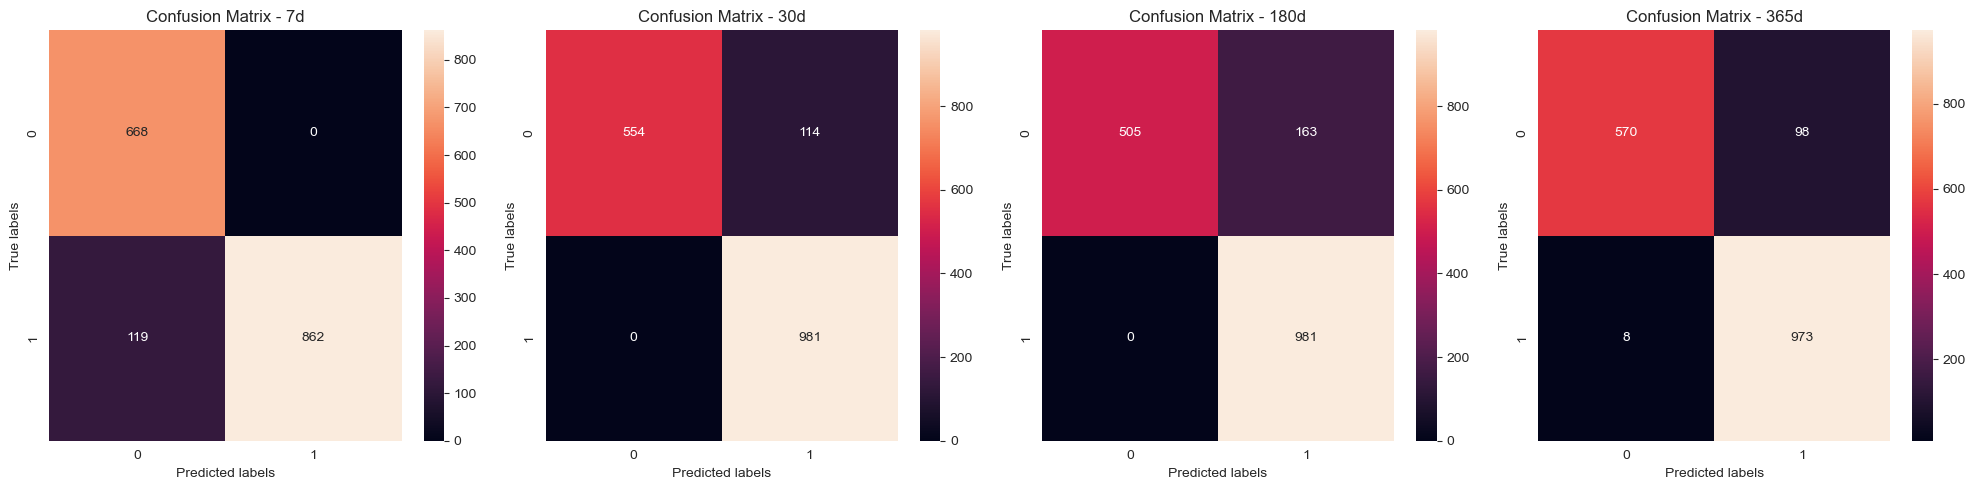

In [336]:
titles = ['7d', '30d', '180d', '365d']
conf_matrices = [results_port_l_30_300_7d_conf_matrix, results_port_l_30_300_30d_conf_matrix, results_port_l_30_300_180d_conf_matrix, results_port_l_30_300_365d_conf_matrix]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for ax, cm, title in zip(axes, conf_matrices, titles):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
plt.tight_layout()
plt.savefig('port_l_30_300_confusion_matrices.png')
plt.show()

In [337]:
cumulative_return.to_csv('port_l_30_300_cumulative_return.csv')

In [338]:
# port_l_30_300

y_pred = cumulative_return['port_l_30_300_365d_pred']
y_test = cumulative_return['port_l_30_300_365d_test']
risk_free_rate = calculate_daily_risk_free_log_return(0.02, 252)

beta = 1

sharpe_ratio_test = calculate_sharpe_ratio(y_test, risk_free_rate)
treynor_ratio_test = calculate_treynor_ratio(y_test, risk_free_rate, beta)
jensens_alpha_test = calculate_jensens_alpha(y_test, y_test, risk_free_rate, beta)  

sharpe_ratio_pred = calculate_sharpe_ratio(y_pred, risk_free_rate)
treynor_ratio_pred = calculate_treynor_ratio(y_pred, risk_free_rate, beta)
jensens_alpha_pred = calculate_jensens_alpha(y_pred, y_test, risk_free_rate, beta)  

print(f"Performance metrics for y_test:\nSharpe Ratio: {sharpe_ratio_test}\nTreynor Ratio: {treynor_ratio_test}\nJensen's Alpha: {jensens_alpha_test}")
print(f"\nPerformance metrics for y_pred:\nSharpe Ratio: {sharpe_ratio_pred}\nTreynor Ratio: {treynor_ratio_pred}\nJensen's Alpha: {jensens_alpha_pred}")

Performance metrics for y_test:
Sharpe Ratio: 1.5090550550150552
Treynor Ratio: 1.7938597806717753
Jensen's Alpha: 0.0

Performance metrics for y_pred:
Sharpe Ratio: 1.7132010190118687
Treynor Ratio: 18.779124211900772
Jensen's Alpha: 16.985264431228998


In [339]:
cumulative_return = pd.DataFrame()

In [340]:
df = pd.read_csv('results_portfolio_losers_window_365_assets_100_7d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM
    
cumulative_return['port_l_365_100_7d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_365_100_7d_pred'] = y_pred.cumsum().copy()
    
results_port_l_365_100_7d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_365_100_7d_conf_matrix)

results_port_l_365_100_7d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_l_365_100_7d_classification_report)


[[690   8]
 [ 41 910]]
{'-1': {'precision': 0.9439124487004104, 'recall': 0.9885386819484241, 'f1-score': 0.9657102869139259, 'support': 698.0}, '1': {'precision': 0.9912854030501089, 'recall': 0.9568874868559412, 'f1-score': 0.9737827715355805, 'support': 951.0}, 'accuracy': 0.9702850212249848, 'macro avg': {'precision': 0.9675989258752596, 'recall': 0.9727130844021826, 'f1-score': 0.9697465292247531, 'support': 1649.0}, 'weighted avg': {'precision': 0.971233054877829, 'recall': 0.9702850212249848, 'f1-score': 0.9703657950250195, 'support': 1649.0}}


In [341]:
df = pd.read_csv('results_portfolio_losers_window_365_assets_100_30d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_365_100_30d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_365_100_30d_pred'] = y_pred.cumsum().copy()

results_port_l_365_100_30d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_365_100_30d_conf_matrix)

results_port_l_365_100_30d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_l_365_100_30d_classification_report)


[[613  85]
 [  6 945]]
{'-1': {'precision': 0.9903069466882067, 'recall': 0.8782234957020058, 'f1-score': 0.9309035687167806, 'support': 698.0}, '1': {'precision': 0.9174757281553398, 'recall': 0.9936908517350158, 'f1-score': 0.9540636042402827, 'support': 951.0}, 'accuracy': 0.944815039417829, 'macro avg': {'precision': 0.9538913374217732, 'recall': 0.9359571737185108, 'f1-score': 0.9424835864785317, 'support': 1649.0}, 'weighted avg': {'precision': 0.9483042245385667, 'recall': 0.944815039417829, 'f1-score': 0.9442602659774539, 'support': 1649.0}}


In [342]:

df = pd.read_csv('results_portfolio_losers_window_365_assets_100_180d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_365_100_180d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_365_100_180d_pred'] = y_pred.cumsum().copy()

results_port_l_365_100_180d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_365_100_180d_conf_matrix)

results_port_l_365_100_180d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_l_365_100_180d_classification_report)

[[663  35]
 [ 25 926]]
{'-1': {'precision': 0.9636627906976745, 'recall': 0.9498567335243553, 'f1-score': 0.9567099567099567, 'support': 698.0}, '1': {'precision': 0.963579604578564, 'recall': 0.9737118822292324, 'f1-score': 0.9686192468619247, 'support': 951.0}, 'accuracy': 0.9636143117040631, 'macro avg': {'precision': 0.9636211976381193, 'recall': 0.9617843078767938, 'f1-score': 0.9626646017859407, 'support': 1649.0}, 'weighted avg': {'precision': 0.9636148161680964, 'recall': 0.9636143117040631, 'f1-score': 0.9635782010607884, 'support': 1649.0}}


In [343]:

df = pd.read_csv('results_portfolio_losers_window_365_assets_100_365d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_365_100_365d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_365_100_365d_pred'] = y_pred.cumsum().copy()

results_port_l_365_100_365d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_365_100_365d_conf_matrix)

results_port_l_365_100_365d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_l_365_100_365d_classification_report)

[[655  43]
 [  5 946]]
{'-1': {'precision': 0.9924242424242424, 'recall': 0.9383954154727794, 'f1-score': 0.9646539027982327, 'support': 698.0}, '1': {'precision': 0.9565217391304348, 'recall': 0.9947423764458465, 'f1-score': 0.9752577319587629, 'support': 951.0}, 'accuracy': 0.9708914493632504, 'macro avg': {'precision': 0.9744729907773386, 'recall': 0.966568895959313, 'f1-score': 0.9699558173784978, 'support': 1649.0}, 'weighted avg': {'precision': 0.971718796316049, 'recall': 0.9708914493632504, 'f1-score': 0.9707692706161006, 'support': 1649.0}}


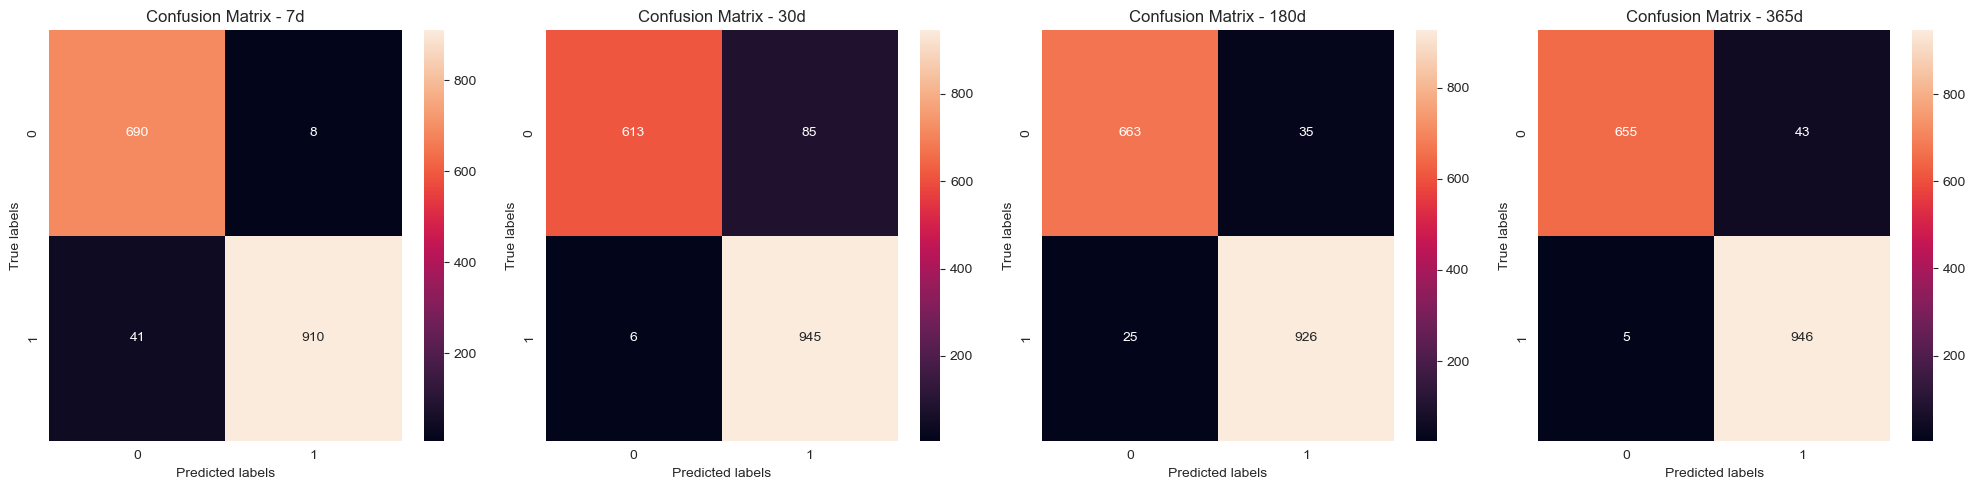

In [344]:
titles = ['7d', '30d', '180d', '365d']
conf_matrices = [results_port_l_365_100_7d_conf_matrix, results_port_l_365_100_30d_conf_matrix, results_port_l_365_100_180d_conf_matrix, results_port_l_365_100_365d_conf_matrix]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for ax, cm, title in zip(axes, conf_matrices, titles):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
plt.tight_layout()
plt.savefig('port_l_365_100_confusion_matrices.png')
plt.show()


In [345]:
cumulative_return.to_csv('port_l_365_100_cumulative_return.csv')


In [346]:
# port_l_365_100

y_pred = cumulative_return['port_l_365_100_365d_pred']
y_test = cumulative_return['port_l_365_100_365d_test']
risk_free_rate = calculate_daily_risk_free_log_return(0.02, 252)

beta = 1

sharpe_ratio_test = calculate_sharpe_ratio(y_test, risk_free_rate)
treynor_ratio_test = calculate_treynor_ratio(y_test, risk_free_rate, beta)
jensens_alpha_test = calculate_jensens_alpha(y_test, y_test, risk_free_rate, beta)  

sharpe_ratio_pred = calculate_sharpe_ratio(y_pred, risk_free_rate)
treynor_ratio_pred = calculate_treynor_ratio(y_pred, risk_free_rate, beta)
jensens_alpha_pred = calculate_jensens_alpha(y_pred, y_test, risk_free_rate, beta)  

print(f"Performance metrics for y_test:\nSharpe Ratio: {sharpe_ratio_test}\nTreynor Ratio: {treynor_ratio_test}\nJensen's Alpha: {jensens_alpha_test}")
print(f"\nPerformance metrics for y_pred:\nSharpe Ratio: {sharpe_ratio_pred}\nTreynor Ratio: {treynor_ratio_pred}\nJensen's Alpha: {jensens_alpha_pred}")

Performance metrics for y_test:
Sharpe Ratio: 1.4515698854594585
Treynor Ratio: 2.6475094322806294
Jensen's Alpha: 0.0

Performance metrics for y_pred:
Sharpe Ratio: 1.7044150591629392
Treynor Ratio: 20.046354934634476
Jensen's Alpha: 17.398845502353847


In [347]:
cumulative_return = pd.DataFrame()

In [348]:
df = pd.read_csv('results_portfolio_winners_window_1_assets_300_7d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_w_1_300_7d_test'] = df['return'].cumsum().copy()
cumulative_return['port_w_1_300_7d_pred'] = y_pred.cumsum().copy()

results_port_w_1_300_7d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_w_1_300_7d_conf_matrix)

results_port_w_1_300_7d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_w_1_300_7d_classification_report)

[[ 578   29]
 [  42 1000]]
{'-1': {'precision': 0.932258064516129, 'recall': 0.9522240527182867, 'f1-score': 0.9421352893235534, 'support': 607.0}, '1': {'precision': 0.9718172983479106, 'recall': 0.9596928982725528, 'f1-score': 0.9657170449058426, 'support': 1042.0}, 'accuracy': 0.9569436021831413, 'macro avg': {'precision': 0.9520376814320198, 'recall': 0.9559584754954198, 'f1-score': 0.953926167114698, 'support': 1649.0}, 'weighted avg': {'precision': 0.957255470005951, 'recall': 0.9569436021831413, 'f1-score': 0.9570365563440175, 'support': 1649.0}}


In [349]:
df = pd.read_csv('results_portfolio_winners_window_1_assets_300_30d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_w_1_300_30d_test'] = df['return'].cumsum().copy()
cumulative_return['port_w_1_300_30d_pred'] = y_pred.cumsum().copy()

results_port_w_1_300_30d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_w_1_300_30d_conf_matrix)

results_port_w_1_300_30d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_w_1_300_30d_classification_report)


[[ 582   25]
 [  17 1025]]
{'-1': {'precision': 0.9716193656093489, 'recall': 0.9588138385502472, 'f1-score': 0.9651741293532338, 'support': 607.0}, '1': {'precision': 0.9761904761904762, 'recall': 0.9836852207293666, 'f1-score': 0.9799235181644359, 'support': 1042.0}, 'accuracy': 0.9745300181928441, 'macro avg': {'precision': 0.9739049208999125, 'recall': 0.9712495296398069, 'f1-score': 0.9725488237588349, 'support': 1649.0}, 'weighted avg': {'precision': 0.974507841792208, 'recall': 0.9745300181928441, 'f1-score': 0.9744942404152548, 'support': 1649.0}}


In [350]:
df = pd.read_csv('results_portfolio_winners_window_1_assets_300_180d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_w_1_300_180d_test'] = df['return'].cumsum().copy()
cumulative_return['port_w_1_300_180d_pred'] = y_pred.cumsum().copy()

results_port_w_1_300_180d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_w_1_300_180d_conf_matrix)

results_port_w_1_300_180d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_w_1_300_180d_classification_report)

[[600   7]
 [ 79 963]]
{'-1': {'precision': 0.8836524300441826, 'recall': 0.9884678747940692, 'f1-score': 0.9331259720062207, 'support': 607.0}, '1': {'precision': 0.9927835051546392, 'recall': 0.9241842610364683, 'f1-score': 0.9572564612326044, 'support': 1042.0}, 'accuracy': 0.947847180109157, 'macro avg': {'precision': 0.9382179675994109, 'recall': 0.9563260679152688, 'f1-score': 0.9451912166194125, 'support': 1649.0}, 'weighted avg': {'precision': 0.9526121512480005, 'recall': 0.947847180109157, 'f1-score': 0.9483739827848089, 'support': 1649.0}}


In [351]:
df = pd.read_csv('results_portfolio_winners_window_1_assets_300_365d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_w_1_300_365d_test'] = df['return'].cumsum().copy()
cumulative_return['port_w_1_300_365d_pred'] = y_pred.cumsum().copy()
    
results_port_w_1_300_365d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_w_1_300_365d_conf_matrix)

results_port_w_1_300_365d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_w_1_300_365d_classification_report)

[[554  53]
 [199 843]]
{'-1': {'precision': 0.7357237715803453, 'recall': 0.9126853377265239, 'f1-score': 0.8147058823529411, 'support': 607.0}, '1': {'precision': 0.9408482142857143, 'recall': 0.809021113243762, 'f1-score': 0.8699690402476781, 'support': 1042.0}, 'accuracy': 0.8471801091570649, 'macro avg': {'precision': 0.8382859929330297, 'recall': 0.860853225485143, 'f1-score': 0.8423374613003096, 'support': 1649.0}, 'weighted avg': {'precision': 0.8653415213068428, 'recall': 0.8471801091570649, 'f1-score': 0.8496265679359101, 'support': 1649.0}}


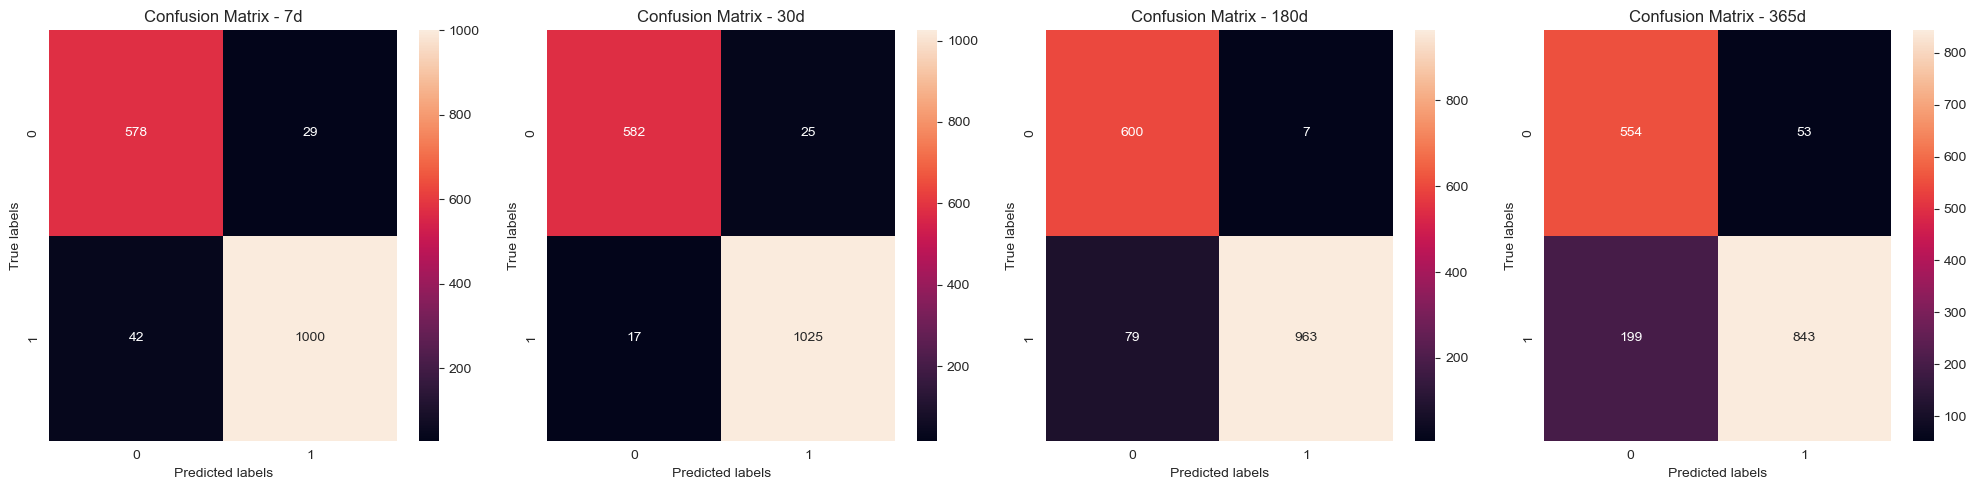

In [352]:
titles = ['7d', '30d', '180d', '365d']
conf_matrices = [results_port_w_1_300_7d_conf_matrix, results_port_w_1_300_30d_conf_matrix, results_port_w_1_300_180d_conf_matrix, results_port_w_1_300_365d_conf_matrix]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
    
for ax, cm, title in zip(axes, conf_matrices, titles):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
plt.tight_layout()
plt.savefig('port_w_1_300_confusion_matrices.png')
plt.show()

In [353]:
cumulative_return.to_csv('port_w_1_300_cumulative_return.csv')

In [354]:
# port_w_1_300

y_pred = cumulative_return['port_w_1_300_30d_pred']
y_test = cumulative_return['port_w_1_300_30d_test']
risk_free_rate = calculate_daily_risk_free_log_return(0.02, 252)

beta = 1

sharpe_ratio_test = calculate_sharpe_ratio(y_test, risk_free_rate)
treynor_ratio_test = calculate_treynor_ratio(y_test, risk_free_rate, beta)
jensens_alpha_test = calculate_jensens_alpha(y_test, y_test, risk_free_rate, beta)  

sharpe_ratio_pred = calculate_sharpe_ratio(y_pred, risk_free_rate)
treynor_ratio_pred = calculate_treynor_ratio(y_pred, risk_free_rate, beta)
jensens_alpha_pred = calculate_jensens_alpha(y_pred, y_test, risk_free_rate, beta)  

print(f"Performance metrics for y_test:\nSharpe Ratio: {sharpe_ratio_test}\nTreynor Ratio: {treynor_ratio_test}\nJensen's Alpha: {jensens_alpha_test}")
print(f"\nPerformance metrics for y_pred:\nSharpe Ratio: {sharpe_ratio_pred}\nTreynor Ratio: {treynor_ratio_pred}\nJensen's Alpha: {jensens_alpha_pred}")

Performance metrics for y_test:
Sharpe Ratio: 1.6357677671198358
Treynor Ratio: 5.415665915052894
Jensen's Alpha: 0.0

Performance metrics for y_pred:
Sharpe Ratio: 1.7437664671655946
Treynor Ratio: 19.781288900236778
Jensen's Alpha: 14.365622985183883


In [355]:
print(results_7d_class_report)

{'-1': {'precision': 0.5513888888888889, 'recall': 0.5135834411384217, 'f1-score': 0.5318151373074347, 'support': 773.0}, '1': {'precision': 0.5952637244348762, 'recall': 0.6312785388127854, 'f1-score': 0.612742382271468, 'support': 876.0}, 'accuracy': 0.5761067313523347, 'macro avg': {'precision': 0.5733263066618826, 'recall': 0.5724309899756035, 'f1-score': 0.5722787597894514, 'support': 1649.0}, 'weighted avg': {'precision': 0.574696563805981, 'recall': 0.5761067313523347, 'f1-score': 0.5748062025521242, 'support': 1649.0}}


In [356]:
cumulative_return = pd.DataFrame()

In [357]:
df = pd.read_csv('results_portfolio_losers_window_7_assets_300_7d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_7_300_7d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_7_300_7d_pred'] = y_pred.cumsum().copy()

results_port_l_7_300_7d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_7_300_7d_conf_matrix)

results_port_l_7_300_7d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_l_7_300_7d_classification_report)


[[690   9]
 [ 36 914]]
{'-1': {'precision': 0.9504132231404959, 'recall': 0.9871244635193133, 'f1-score': 0.9684210526315788, 'support': 699.0}, '1': {'precision': 0.9902491874322861, 'recall': 0.9621052631578947, 'f1-score': 0.975974372664175, 'support': 950.0}, 'accuracy': 0.9727107337780473, 'macro avg': {'precision': 0.970331205286391, 'recall': 0.974614863338604, 'f1-score': 0.9721977126478769, 'support': 1649.0}, 'weighted avg': {'precision': 0.9733629903189075, 'recall': 0.9727107337780473, 'f1-score': 0.972772571146416, 'support': 1649.0}}


In [358]:
df = pd.read_csv('results_portfolio_losers_window_7_assets_300_30d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_7_300_30d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_7_300_30d_pred'] = y_pred.cumsum().copy()

results_port_l_7_300_30d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_7_300_30d_conf_matrix)

results_port_l_7_300_30d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_l_7_300_30d_classification_report)

[[589 110]
 [  9 941]]
{'-1': {'precision': 0.9849498327759197, 'recall': 0.8426323319027181, 'f1-score': 0.9082498072474942, 'support': 699.0}, '1': {'precision': 0.8953377735490009, 'recall': 0.9905263157894737, 'f1-score': 0.9405297351324338, 'support': 950.0}, 'accuracy': 0.9278350515463918, 'macro avg': {'precision': 0.9401438031624603, 'recall': 0.916579323846096, 'f1-score': 0.924389771189964, 'support': 1649.0}, 'weighted avg': {'precision': 0.9333237222449479, 'recall': 0.9278350515463918, 'f1-score': 0.9268464909895758, 'support': 1649.0}}


In [359]:
df = pd.read_csv('results_portfolio_losers_window_7_assets_300_180d.csv')
    
df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_7_300_180d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_7_300_180d_pred'] = y_pred.cumsum().copy()

results_port_l_7_300_180d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_7_300_180d_conf_matrix)

results_port_l_7_300_180d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_l_7_300_180d_classification_report)

[[683  16]
 [ 71 879]]
{'-1': {'precision': 0.9058355437665783, 'recall': 0.977110157367668, 'f1-score': 0.9401238816242258, 'support': 699.0}, '1': {'precision': 0.982122905027933, 'recall': 0.9252631578947368, 'f1-score': 0.9528455284552845, 'support': 950.0}, 'accuracy': 0.9472407519708914, 'macro avg': {'precision': 0.9439792243972556, 'recall': 0.9511866576312025, 'f1-score': 0.9464847050397551, 'support': 1649.0}, 'weighted avg': {'precision': 0.9497852061063521, 'recall': 0.9472407519708914, 'f1-score': 0.9474529079974858, 'support': 1649.0}}


In [360]:
df = pd.read_csv('results_portfolio_losers_window_7_assets_300_365d.csv')

df.set_index('date', inplace=True)
predictions_classified_LSTM = df.pred_binary
y_test = df['return']
y_pred = y_test * predictions_classified_LSTM

cumulative_return['port_l_7_300_365d_test'] = df['return'].cumsum().copy()
cumulative_return['port_l_7_300_365d_pred'] = y_pred.cumsum().copy()

results_port_l_7_300_365d_conf_matrix = confusion_matrix(df['actual_binary'], df['pred_binary'])
print(results_port_l_7_300_365d_conf_matrix)

results_port_l_7_300_365d_classification_report = classification_report(df['actual_binary'], df['pred_binary'], output_dict=True)
print(results_port_l_7_300_365d_classification_report)

[[699   0]
 [111 839]]
{'-1': {'precision': 0.8629629629629629, 'recall': 1.0, 'f1-score': 0.9264413518886679, 'support': 699.0}, '1': {'precision': 1.0, 'recall': 0.8831578947368421, 'f1-score': 0.9379541643376188, 'support': 950.0}, 'accuracy': 0.9326864766525167, 'macro avg': {'precision': 0.9314814814814815, 'recall': 0.9415789473684211, 'f1-score': 0.9321977581131433, 'support': 1649.0}, 'weighted avg': {'precision': 0.9419109224445793, 'recall': 0.9326864766525167, 'f1-score': 0.9330739606373055, 'support': 1649.0}}


In [361]:
# port_l_7_300

y_pred = cumulative_return['port_l_7_300_180d_pred']
y_test = cumulative_return['port_l_7_300_180d_test']
risk_free_rate = calculate_daily_risk_free_log_return(0.02, 252)

beta = 1

sharpe_ratio_test = calculate_sharpe_ratio(y_test, risk_free_rate)
treynor_ratio_test = calculate_treynor_ratio(y_test, risk_free_rate, beta)
jensens_alpha_test = calculate_jensens_alpha(y_test, y_test, risk_free_rate, beta)  

sharpe_ratio_pred = calculate_sharpe_ratio(y_pred, risk_free_rate)
treynor_ratio_pred = calculate_treynor_ratio(y_pred, risk_free_rate, beta)
jensens_alpha_pred = calculate_jensens_alpha(y_pred, y_test, risk_free_rate, beta)  

print(f"Performance metrics for y_test:\nSharpe Ratio: {sharpe_ratio_test}\nTreynor Ratio: {treynor_ratio_test}\nJensen's Alpha: {jensens_alpha_test}")
print(f"\nPerformance metrics for y_pred:\nSharpe Ratio: {sharpe_ratio_pred}\nTreynor Ratio: {treynor_ratio_pred}\nJensen's Alpha: {jensens_alpha_pred}")

Performance metrics for y_test:
Sharpe Ratio: 1.478822027001577
Treynor Ratio: 1.1622613370599868
Jensen's Alpha: 0.0

Performance metrics for y_pred:
Sharpe Ratio: 1.7220332265276639
Treynor Ratio: 19.04882492201666
Jensen's Alpha: 17.886563584956672


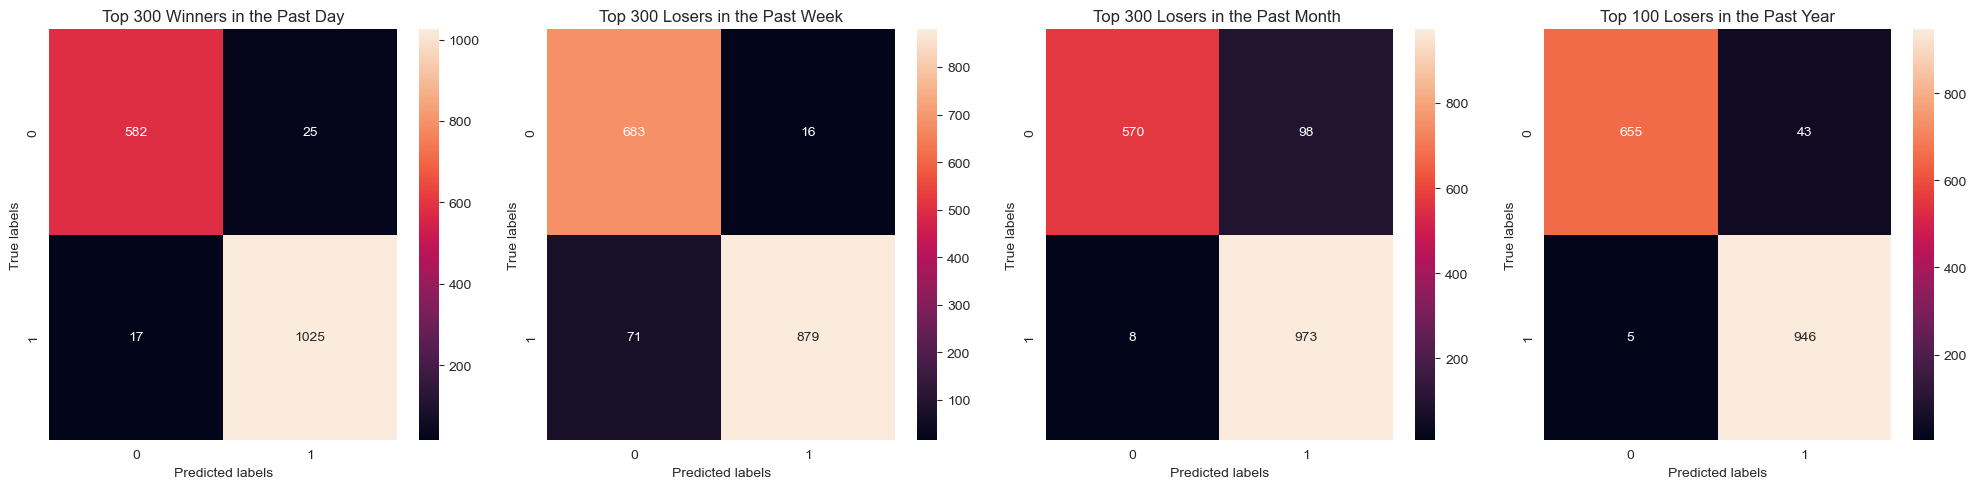

In [363]:
titles = ['Top 300 Winners in the Past Day', 'Top 300 Losers in the Past Week', 'Top 300 Losers in the Past Month ', 'Top 100 Losers in the Past Year']
conf_matrices = [results_port_w_1_300_30d_conf_matrix, results_port_l_7_300_180d_conf_matrix, results_port_l_30_300_365d_conf_matrix, results_port_l_365_100_365d_conf_matrix]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for ax, cm, title in zip(axes, conf_matrices, titles):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_title(f'{title}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
plt.tight_layout()
plt.savefig('conf-mat.png')
plt.show()

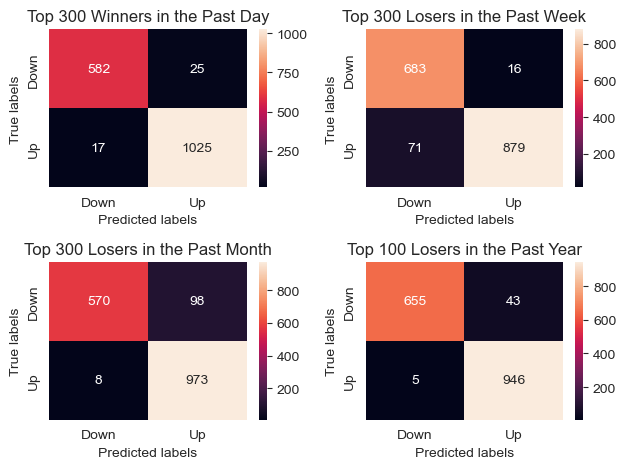

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns

titles = ['Top 300 Winners in the Past Day', 
          'Top 300 Losers in the Past Week', 
          'Top 300 Losers in the Past Month', 
          'Top 100 Losers in the Past Year']

conf_matrices = [results_port_w_1_300_30d_conf_matrix, 
                 results_port_l_7_300_180d_conf_matrix, 
                 results_port_l_30_300_365d_conf_matrix, 
                 results_port_l_365_100_365d_conf_matrix]

fig, axes = plt.subplots(nrows=2, ncols=2)  

for ax, cm, title in zip(axes.flatten(), conf_matrices, titles):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
    ax.set_title(f'{title}')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

plt.tight_layout()
plt.savefig('conf-mat.png')
plt.show()
